In [284]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score
import warnings 
warnings.filterwarnings('ignore')

In [285]:
j = pd.read_csv(r"C:\Users\muralidharan.m\Downloads\insurance.csv")


In [286]:
j.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [287]:
j

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [288]:
j.drop_duplicates(inplace = True)

In [289]:
j

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [290]:
j.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   expenses  1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 67.9+ KB


In [291]:
j.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.00,27.00,39.00,51.00,64.00
bmi,1337.0,30.665520,6.100664,16.00,26.30,30.40,34.70,53.10
children,1337.0,1.095737,1.205571,0.00,0.00,1.00,2.00,5.00
expenses,1337.0,13279.121638,12110.359657,1121.87,4746.34,9386.16,16657.72,63770.43


In [292]:
for col_name in df.select_dtypes(include=np.number).columns[:-1]:
    print(col_name)
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    print("Outliers = ",df.loc[(df[col_name] < low) | (df[col_name] > high), col_name])

age
Outliers =  Series([], Name: age, dtype: int64)
sex
Outliers =  Series([], Name: sex, dtype: int64)
bmi
Outliers =  116     49.1
286     48.1
401     47.5
543     47.4
847     50.4
860     47.6
1047    52.6
1088    47.7
1317    53.1
Name: bmi, dtype: float64
children
Outliers =  Series([], Name: children, dtype: int64)
smoker
Outliers =  0       0
11      0
14      0
19      0
23      0
       ..
1313    0
1314    0
1321    0
1323    0
1337    0
Name: smoker, Length: 274, dtype: int64
region
Outliers =  Series([], Name: region, dtype: int64)


In [293]:
j.nunique()

age           47
sex            2
bmi          275
children       6
smoker         2
region         4
expenses    1337
dtype: int64

In [294]:
j['region'].value_counts()

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

In [295]:
j["region"].replace({
    'southeast': 3,
    'southwest': 4,
    'northeast': 1,
    'northwest': 0
}, inplace=True)

In [296]:
j['sex'].value_counts()

male      675
female    662
Name: sex, dtype: int64

In [297]:
j["sex"].replace({
    'male': 0,
    'female': 1
}, inplace=True)

In [298]:
j['smoker'].value_counts()
j["smoker"].replace({
    'no': 1,
    'yes': 0
}, inplace=True)

In [299]:
numerical_data = df.select_dtypes(include=np.number)
numerical_data

,age,sex,bmi,children,smoker,region,expenses
0,19,1,27.9,0,0,4,16884.92
1,18,0,33.8,1,1,3,1725.55
2,28,0,33.0,3,1,3,4449.46
3,33,0,22.7,0,1,0,21984.47
4,32,0,28.9,0,1,0,3866.86
...,...,...,...,...,...,...,...
1333,50,0,31.0,3,1,0,10600.55
1334,18,1,31.9,0,1,1,2205.98
1335,18,1,36.9,0,1,3,1629.83
1336,21,1,25.8,0,1,4,2007.95


In [300]:
j

,age,sex,bmi,children,smoker,region,expenses
0,19,1,27.9,0,0,4,16884.92
1,18,0,33.8,1,1,3,1725.55
2,28,0,33.0,3,1,3,4449.46
3,33,0,22.7,0,1,0,21984.47
4,32,0,28.9,0,1,0,3866.86
...,...,...,...,...,...,...,...
1333,50,0,31.0,3,1,0,10600.55
1334,18,1,31.9,0,1,1,2205.98
1335,18,1,36.9,0,1,3,1629.83
1336,21,1,25.8,0,1,4,2007.95


In [301]:
categorical_data = df.select_dtypes(exclude=np.number)

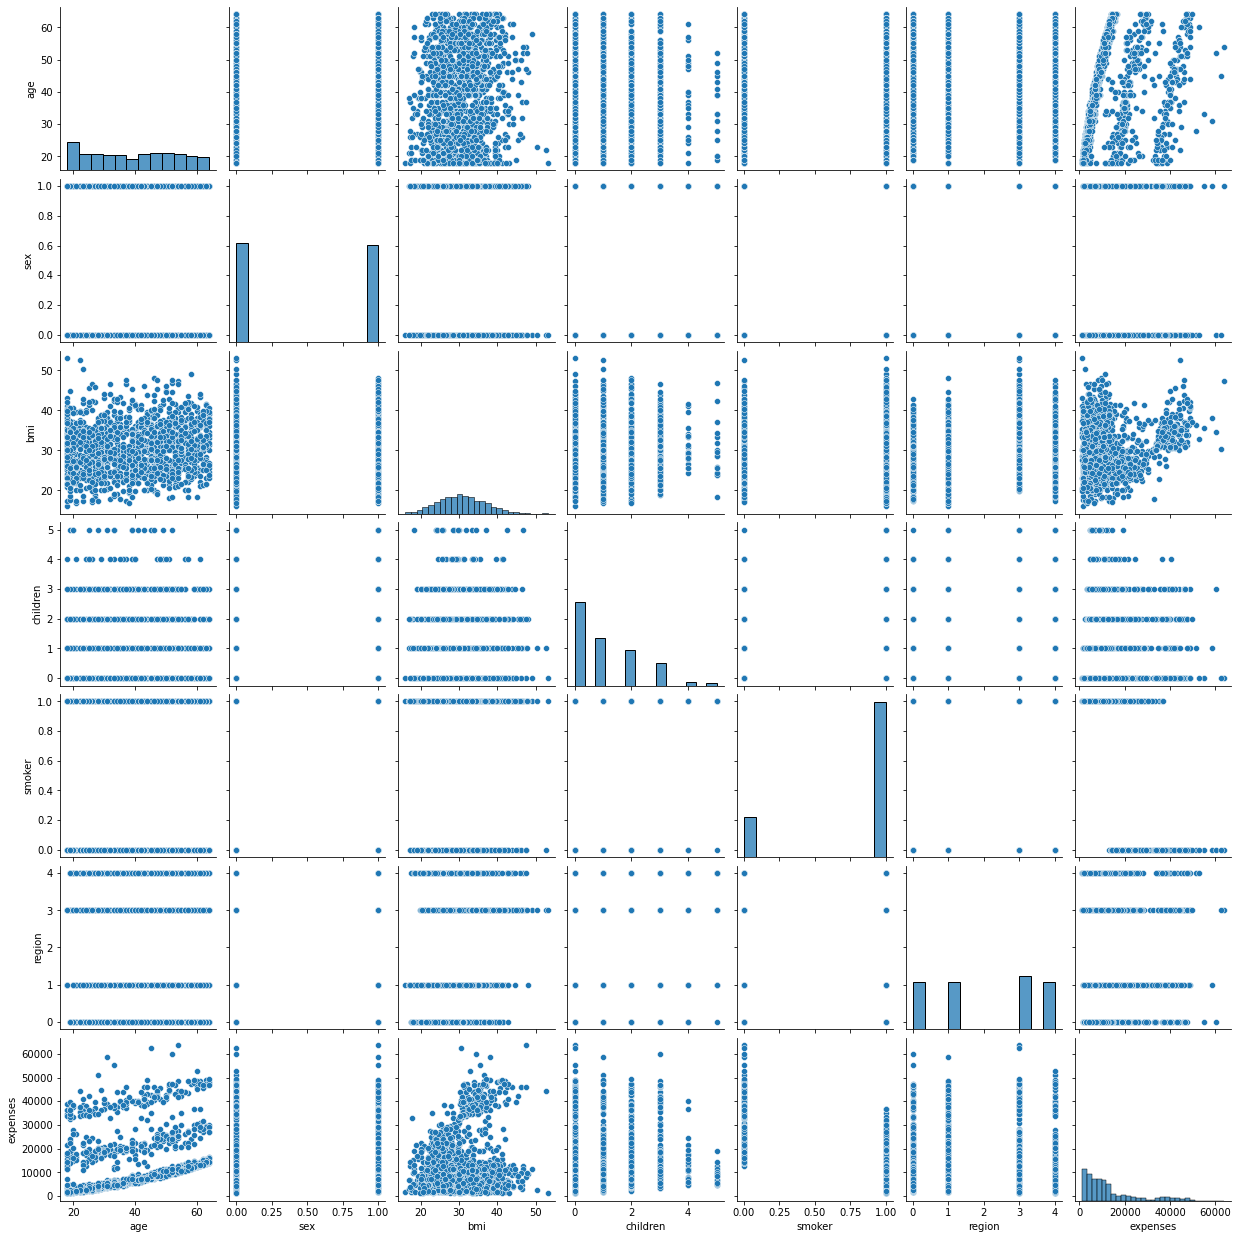

In [302]:
sns.pairplot(j)

In [303]:
j.corr()

,age,sex,bmi,children,smoker,region,expenses
age,1.000000,0.019814,0.109414,0.041536,0.025587,0.000329,0.298308
sex,0.019814,1.000000,-0.046405,-0.017848,0.076596,-0.010307,-0.058045
bmi,0.109414,-0.046405,1.000000,0.012641,-0.003964,0.185469,0.198637
children,0.041536,-0.017848,0.012641,1.000000,-0.007331,-0.002781,0.067389
smoker,0.025587,0.076596,-0.003964,-0.007331,1.000000,-0.018202,-0.787234
region,0.000329,-0.010307,0.185469,-0.002781,-0.018202,1.000000,0.016547
expenses,0.298308,-0.058045,0.198637,0.067389,-0.787234,0.016547,1.000000


<AxesSubplot:>

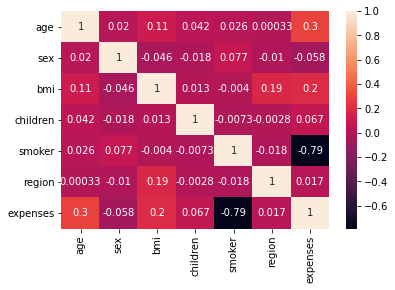

In [304]:
sns.heatmap(j.corr(), annot=True)

In [305]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [306]:
X = j.drop(columns="expenses")

In [307]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

    feature        VIF
0       age   7.817884
1       sex   1.940074
2       bmi  11.588092
3  children   1.799707
4    smoker   4.453058
5    region   2.762843


In [308]:
X = j.drop(columns=["expenses","sex","region"])

In [309]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

    feature       VIF
0       age  7.751741
1       bmi  9.737135
2  children  1.799619
3    smoker  4.369873


In [324]:
y = j["expenses"]

In [325]:
model = LinearRegression()

In [326]:
model.fit(X,y)

LinearRegression()

In [327]:
model.coef_

array([   257.75682741,    321.95831983,    473.16384167, -23809.31420992])

In [328]:
model.intercept_

11707.783737183705

In [329]:
y_pred = model.predict(X)

In [330]:
y_pred

array([25587.80058111,  3893.44747243,  7159.77677397, ...,
        4418.35442223,  1617.88755436, 36799.937316  ])

In [331]:
print("MSE : ",mean_squared_error(y,y_pred))

MSE :  36704886.8414821


In [332]:
print("MAE : ",mean_absolute_error(y,y_pred))

MAE :  4181.0867416370875


In [333]:
print("RMSE : ",np.sqrt(mean_squared_error(y,y_pred)))

RMSE :  6058.45581328131


In [334]:
print("MAPE : ",mean_absolute_percentage_error(y,y_pred))

MAPE :  42.38599803682989


In [335]:
def linear_best_fit(X,y):
    model = LinearRegression()
    model.fit(X,y)
    y_pred = model.predict(X)
    print("MSE : ",mean_squared_error(y,y_pred))
    print("MAE : ",mean_absolute_error(y,y_pred))
    print("RMSE : ",np.sqrt(mean_squared_error(y,y_pred)))
    print("MAPE : ",mean_absolute_percentage_error(y,y_pred))

def mean_absolute_percentage_error(y, y_pred): 
    y, y_pred = np.array(y), np.array(y_pred)
    return np.mean(np.abs((y - y_pred) / y)) * 100

In [336]:
linear_best_fit(X,y)

MSE :  36704886.8414821
MAE :  4181.0867416370875
RMSE :  6058.45581328131
MAPE :  42.38599803682991


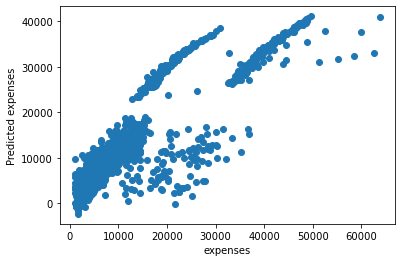

In [337]:
plt.xlabel("expenses")
plt.ylabel("Predicted expenses")
plt.scatter(y, y_pred)

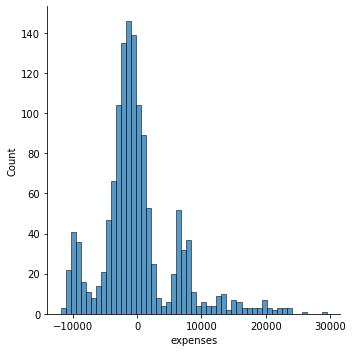

In [338]:
error = y-y_pred
sns.displot(error)

In [ ]:
error = y-y_pred

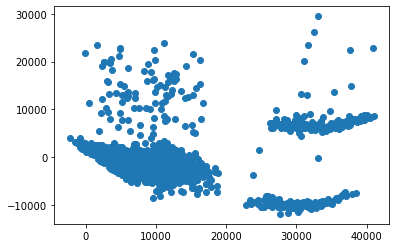

In [339]:
plt.scatter( y_pred, error)

In [340]:
X

,age,bmi,children,smoker
0,19,27.9,0,0
1,18,33.8,1,1
2,28,33.0,3,1
3,33,22.7,0,1
4,32,28.9,0,1
...,...,...,...,...
1333,50,31.0,3,1
1334,18,31.9,0,1
1335,18,36.9,0,1
1336,21,25.8,0,1


In [341]:
y

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1337, dtype: float64

In [342]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score

In [343]:
X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size = 0.3, random_state=90)

In [344]:
y_train

589      5976.83
261     17085.27
744      8827.21
1293     9301.89
1294    11931.13
          ...   
570      3761.29
452      1969.61
680      2585.27
672      4399.73
670      4837.58
Name: expenses, Length: 935, dtype: float64

In [345]:
y_test

1247     6059.17
810      9414.92
164      5028.15
405     11396.90
638     20149.32
          ...   
154      7077.19
1229    11938.26
1136     7623.52
518      5240.77
318      7421.19
Name: expenses, Length: 402, dtype: float64

In [367]:
kf = KFold(n_splits=10)

In [368]:
X

,age,bmi,children,smoker
0,19,27.9,0,0
1,18,33.8,1,1
2,28,33.0,3,1
3,33,22.7,0,1
4,32,28.9,0,1
...,...,...,...,...
1333,50,31.0,3,1
1334,18,31.9,0,1
1335,18,36.9,0,1
1336,21,25.8,0,1


In [369]:
type(X)

pandas.core.frame.DataFrame

In [370]:
type(y)

pandas.core.series.Series

In [394]:
i=1
test_result = []
for train_index, test_index in kf.split(X):
    train_X = X.iloc[train_index]
    train_y = y.iloc[train_index]
    test_X = X.iloc[test_index]
    test_y = y.iloc[test_index]
    
    model = LinearRegression()
    model.fit(train_X, train_y)

    train_pred = model.predict(train_X)
    test_pred = model.predict(test_X)
    
    train_mape = np.sqrt(mean_squared_error(train_y, train_pred))
    test_mape = np.sqrt(mean_squared_error(test_y, test_pred))
    print("Train MAPE = ",train_mape)
    print("Test MAPE = ",test_mape)
    
    test_result.append(test_mape)

Train MAPE =  6067.082102422544
Test MAPE =  5986.973559282415
Train MAPE =  6045.781557365938
Test MAPE =  6177.236893192576
Train MAPE =  6062.293437916717
Test MAPE =  6029.501394047281
Train MAPE =  6036.883846854314
Test MAPE =  6273.402166006893
Train MAPE =  6037.066964974705
Test MAPE =  6267.059517761874
Train MAPE =  6153.592514892994
Test MAPE =  5145.762318663893
Train MAPE =  6108.709218741275
Test MAPE =  5590.370922159635
Train MAPE =  5949.105733287497
Test MAPE =  6982.965937544974
Train MAPE =  6088.701454154141
Test MAPE =  5791.78800646399
Train MAPE =  6020.531344103638
Test MAPE =  6406.115882241166


In [395]:
np.mean(test_result)

6065.11765973647

In [396]:
model = LinearRegression()
np.mean(np.abs(cross_val_score(model, X, y, scoring = 'neg_root_mean_squared_error', cv = 10)))

6065.11765973647

In [397]:
X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size = 0.3, random_state=90)

In [398]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [399]:
train_pred = model.predict(X_train)

In [400]:
test_pred = model.predict(X_test)

In [401]:
np.sqrt(mean_squared_error(y_train, train_pred))

6015.564809321192

In [402]:
np.sqrt(mean_squared_error(y_test, test_pred))

6168.974347580331

In [403]:
r2 = r2_score(y_train, train_pred)

In [404]:
r2

0.7410901122803124

In [405]:
X_train.shape

(935, 4)

In [406]:
n, p = X_train.shape[0], X_train.shape[1]

In [407]:
r2

0.7410901122803124

In [408]:
adjr2 = 1-(((1-r2)*(n-1))/(n-p-1))

In [409]:
adjr2

0.739976521365389